In [30]:
import pandas as pd
import os
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
POSTGRES_USER='aalonso'
POSTGRES_PASS='ITBA'
POSTGRES_HOST="localhost"
POSTGRES_DB='database_pizza'
POSTGRES_PORT='5432'
POSTGRES_SCHEMA='schema_pizza'

In [3]:
str_conection=f"postgresql://{POSTGRES_USER}:{POSTGRES_PASS}@{POSTGRES_HOST}:{POSTGRES_PORT}/{POSTGRES_DB}"

In [4]:
engine=create_engine(str_conection,
connect_args={'options': f'-csearch_path={POSTGRES_SCHEMA}'})

In [5]:
conn = engine.connect()

In [20]:
df_year_month=pd.read_sql("""select o2.year,o2.month, round(sum(o.quantity*p.price)) as total_order_amount 
from schema_pizza.order_details o
inner join schema_pizza.orders o2 on o.order_id=o2.order_id
left join schema_pizza.pizzas p on p.pizza_id=o.pizza_id
group by o2.year,o2.month
order by o2.year,o2.month;
""",conn)

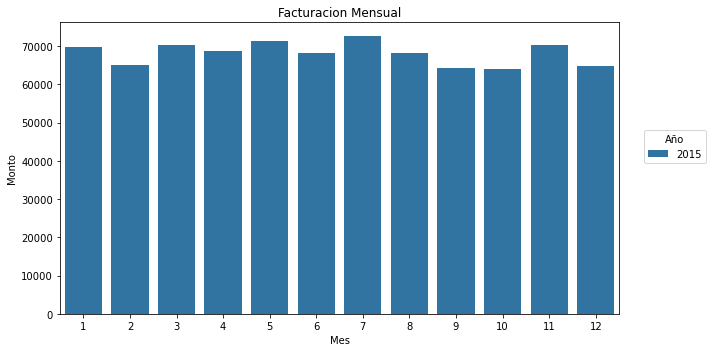

In [78]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_year_month,x=df_year_month['month'],
            y='total_order_amount',
            #color='blue',
            hue='year',
            )
plt.title('Facturacion Mensual')
plt.xlabel('Mes')
plt.ylabel('Monto')
plt.legend(loc=8, bbox_to_anchor=(1.1, 0.5),title="Año")
plt.tight_layout()
plt.savefig(r'\\wsl$\Ubuntu\home\ariel\TP-Foundations\Reports\graphs\facturacion.jpg',dpi=300)

In [ ]:
conn.close()